#### About Dataset
**Context**
This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

**Content**
- Attribute Information:

- InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
- UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
- CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal. The name of the country where a customer resides.

### Unsupervised Learning Problem Statement:
**Customer Segmentation Analysis**:  I want to understand how different unsupervised learning techniques can reveal customer pattern
**Goal:** To segment customers based on their purchasing behavior using unsupervised learning techniques (KMeans, DBSCAN, Hierarchical Clustering). This will enable the business to design tailored marketing strategies, promotions, and customer retention plans.

* This is a classic unsupervised problem because we don’t have predefined customer labels or segments. Instead, we aim to discover hidden structure in the data that groups similar customers together.

**Expected Business Value:**
- Identify high-value customer segments
- Develop targeted marketing strategies for different customer types
- Improve customer retention through personalized approaches

In [158]:
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer


### Data Collection & Wrangling

## Exploratory Data Analysis (EDA)

In [159]:
df = pd.read_csv("/kaggle/input/online-retail-ii-uci/online_retail_II.csv")

In [160]:
def check_df(dataframe, head=5, tail=5, detail=False):
    """
    It gives general sight of dataframe objects.
    Parameters
    ----------
    dataframe: dataframe
        dataframe from which variable(column) names are to be retrieved.
    head: int, default 5
        It determines that how many of the first rows will print.
    tail: int,  default 5
        It determines that how many of the last rows will print.
    detail: boolean, default False
        It gives quantiles values
    Returns
    -------
        this is function don't return anything.It just prints summarized values
    Examples
    ------
    import seaborn as sns
    df = sns.load_dataset("tips")
    print(check_df(df,detail=True))
    """

    print("##################### Index #####################")
    print(dataframe.index)
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(tail))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Total NA #####################")
    print(dataframe.isnull().sum().sum())
    if detail:
        print("##################### Quantiles #####################")
        print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
        print("##################### Describe #####################")
        print(dataframe.describe().T)

In [161]:
check_df(df, head=5, tail=5)

##################### Index #####################
RangeIndex(start=0, stop=1067371, step=1)
##################### Shape #####################
(1067371, 8)
##################### Types #####################
Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object
##################### Head #####################
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  20

In [162]:
summary = df.drop(columns=['Customer ID']).describe()
summary_formatted = summary.map(lambda x: f"{x:,.2f}")
print(summary_formatted)

           Quantity         Price
count  1,067,371.00  1,067,371.00
mean           9.94          4.65
std          172.71        123.55
min      -80,995.00    -53,594.36
25%            1.00          1.25
50%            3.00          2.10
75%           10.00          4.15
max       80,995.00     38,970.00


## Comments

### Quality

This retail dataset contains 1,067,371 transactions and 8 columns(factors or features), which is good for analysis. It includes online retail data from 2009 to 2011.

- Shape: 1,067,371 rows and 8 columns.
- Missing values: 4,382 missing descriptions and 243,007 missing Customer IDs.(since we have enough data I will drop them.)
- Data types: Most are appropriate.
  - 'Invoice', 'StockCode', and 'Country' are object types.
  - 'Quantity' is int64 and 'Price' is float64.
  - 'InvoiceDate' is stored as an object and should be converted to datetime.
    
- Price range: From -53,594 to 38,970. Here there are negative prices which is not normal. I did some search online these are canceled orders, so I will drop them as well.  
- Quantity range: From -80,995 to 80,995. Negative values again suggest cancelled ones.
- Countries: While most transactions are from the United Kingdom, other countries like France are included.

### Issues Identified

- 243,007 missing Customer IDs — nearly one-quarter of the data lacks identifiable customer information.(I will drop them!!!)
- 4,382 missing product descriptions — limits product-level insights.
- Negative quantities and prices — may indicate returns but need to be confirmed.(I will drop missing values!!)
- InvoiceDate is not in datetime format.
- Extremely large quantity values (80,000+) that may be data entry errors or unusual bulk transactions.

### Next Steps

- Convert InvoiceDate to datetime format.
- Remove the missing values.
- Remove the transactions that contains negative values in Quantity and Price.
- Examine and filter out extreme quantity values if they are found to be unrealistic***.

### Feature Engineering Ideas so far

- Create a 'TotalPrice column as Quantity × Price.
- Generate time-based features from InvoiceDate, such as month, day of week, and hour.
- Rank products by popularity based on sales volume or revenue.


#### Removing Missing values.
* I am removing them because I don't know the root cause of these missing values, otherwise in real scenerio we need to check why are missing and first approach should be filling those.

In [163]:
df.dropna(inplace=True)

#### Testing there is no missing value left!

In [164]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

#### Removing Cancelled Orders!
* Cancelled orders has no contribution to our analysis. 

In [165]:
df = df[~df["Invoice"].str.contains("C", na=False)]

#### Testing the operation

In [166]:
df["Invoice"].str.contains("C", na=False).sum()

0

#### Fixing the column type of InvoiceDate

In [167]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [168]:
### Test
df['InvoiceDate'].info()

<class 'pandas.core.series.Series'>
Index: 805620 entries, 0 to 1067370
Series name: InvoiceDate
Non-Null Count   Dtype         
--------------   -----         
805620 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 12.3 MB


#### Removing rows with negative Quantity or Price


In [169]:
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

In [170]:
#### test
summary = df.drop(columns=['Customer ID','InvoiceDate']).describe()
summary_formatted = summary.map(lambda x: f"{x:,.2f}")
print(summary_formatted)

         Quantity       Price
count  805,549.00  805,549.00
mean        13.29        3.21
std        143.63       29.20
min          1.00        0.00
25%          2.00        1.25
50%          5.00        1.95
75%         12.00        3.75
max     80,995.00   10,953.50


#### Creating TotalPrice column

In [171]:
df['TotalPrice'] = df['Quantity'] * df['Price']

#### Creating date related values

In [172]:
df['Month'] = df['InvoiceDate'].dt.month
df['WeekOfYear'] = df['InvoiceDate'].dt.isocalendar().week

####  Outlier Analysis

In [173]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    """-***Note if data is skewed right or left use median value.***"""
    # üst v alt limitleri hesaplayıp döndürür.
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [174]:
def check_outlier(dataframe, col_name, q1=0.25, q3=0.75):
    """
    aykırı değer var mı yok sonucunu döner  
    """
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1=q1, q3=q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [175]:
def replace_with_thresholds(dataframe, variable, q1=0.25, q3=0.75):
    """
    outliarları alt ve üst limite dönüştürüp baskılar.
    """
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=q1, q3=q3)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [176]:
for col in ['Quantity','TotalPrice','Price']:
    result = check_outlier(df, col, q1=0.01, q3=0.99)
    print(col, result)

Quantity True
TotalPrice True
Price True


/tmp/ipykernel_35/1231642502.py:6: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
/tmp/ipykernel_35/1231642502.py:6: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
/tmp/ipykernel_35/1231642502.py:6: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


In [177]:
def num_summary(dataframe, numerical_col, plot=False, plot_type="hist"):
    ''' It summarizes the numerical variables in the dataset'''
    print("##################### Describe #####################")
    print(dataframe[numerical_col].describe(), "\n\n")
    print("##################### Total NA #####################")
    print(dataframe.isnull().sum().sum())
    if plot:
        if plot_type == "hist":
            dataframe[numerical_col].hist(bins=30)
            plt.xlabel(numerical_col)
            plt.title(numerical_col)
            plt.show()

        elif plot_type == "box_plot":
            sns.boxplot(x=dataframe[numerical_col])
            plt.xlabel(numerical_col)
            plt.title(numerical_col)
            plt.show()
        else:
            print("Please enter the correct graph name!!!")

##################### Describe #####################
count    805549.000000
mean         13.290522
std         143.634088
min           1.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64 


##################### Total NA #####################
0


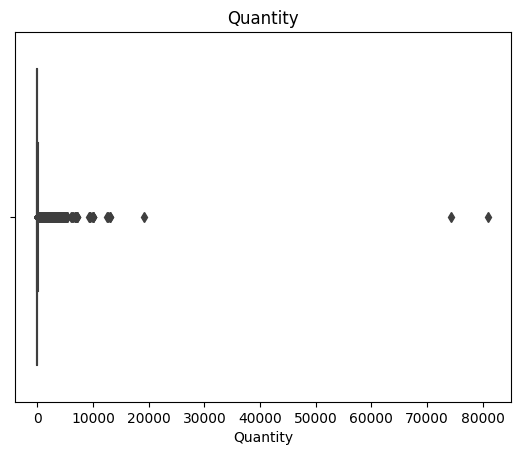

##################### Describe #####################
count    805549.000000
mean         22.026505
std         224.041928
min           0.001000
25%           4.950000
50%          11.850000
75%          19.500000
max      168469.600000
Name: TotalPrice, dtype: float64 


##################### Total NA #####################
0


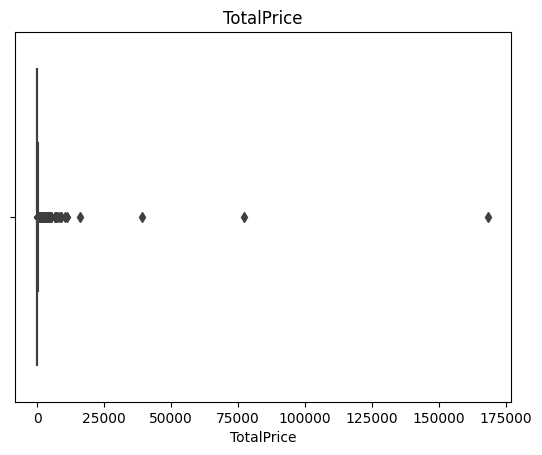

##################### Describe #####################
count    805549.000000
mean          3.206561
std          29.199173
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max       10953.500000
Name: Price, dtype: float64 


##################### Total NA #####################
0


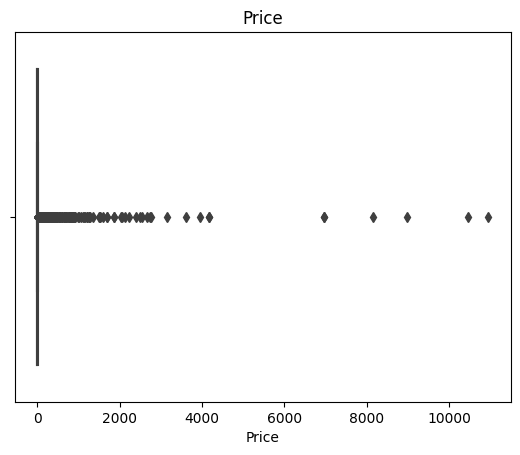

In [178]:
for col in ['Quantity','TotalPrice','Price']:
    num_summary(df, col,plot=True, plot_type='box_plot')

As we can observe from our box plot visual our dataset has outlier and they effecting our descriptive stats!!! I will cap them using quantile methods. 

def num_summary(dataframe, numerical_col, plot=False, plot_type="hist"):


In [179]:
for col in ['Quantity','TotalPrice','Price']:
    replace_with_thresholds(df, col, q1=0.10, q3=0.90)

/tmp/ipykernel_35/1247346254.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-33.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit


##################### Describe #####################
count    805549.000000
mean          9.606031
std          12.426040
min           1.000000
25%           2.000000
50%           5.000000
75%          12.000000
max          58.500000
Name: Quantity, dtype: float64 


##################### Total NA #####################
0


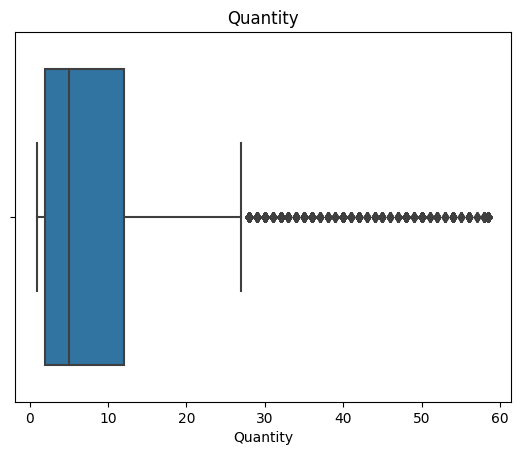

##################### Describe #####################
count    805549.000000
mean         16.758970
std          18.858645
min           0.001000
25%           4.950000
50%          11.850000
75%          19.500000
max          85.380000
Name: TotalPrice, dtype: float64 


##################### Total NA #####################
0


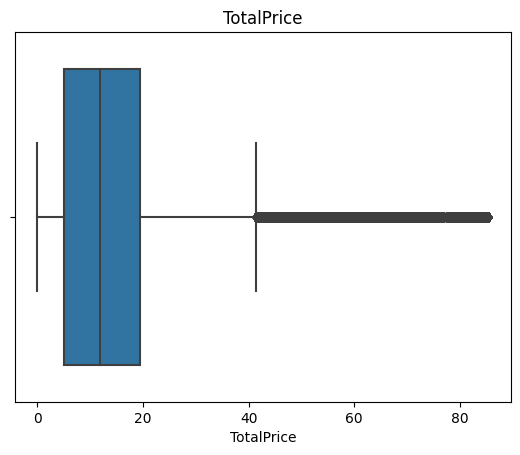

##################### Describe #####################
count    805549.000000
mean          2.893098
std           2.836747
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max          16.050000
Name: Price, dtype: float64 


##################### Total NA #####################
0


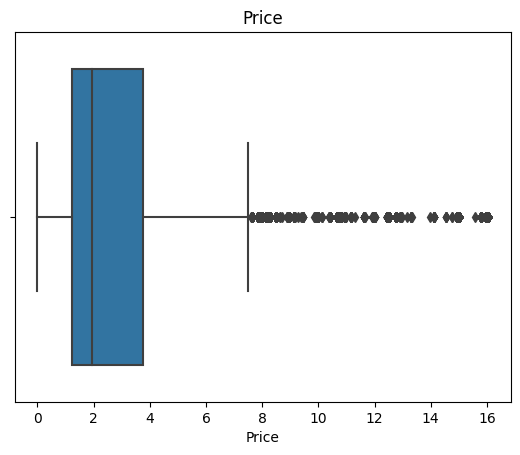

In [180]:
#### Test 
for col in ['Quantity','TotalPrice','Price']:
    num_summary(df, col,plot=True, plot_type='box_plot')

## Outlier Treatment Results

I used the `replace_with_thresholds()` function with q1=0.10 and q3=0.90 to cap the extreme outliers instead of removing them completely. This approach replaces values below the 10th percentile with the 10th percentile value, and values above the 90th percentile with the 90th percentile value.

**Why capping instead of removing?**
- Keeps all our data points 
- Preserves the general patterns while reducing extreme outlier influence
- Makes more sense for business data where outliers might be real transactions

**Results after capping:**
- Box plots now look much cleaner with fewer extreme points
- Distributions appear more normal and easier to analyze
- The data is still representative but less skewed by extreme values

The visuals definitely look more interpretable now!

#### Visuals

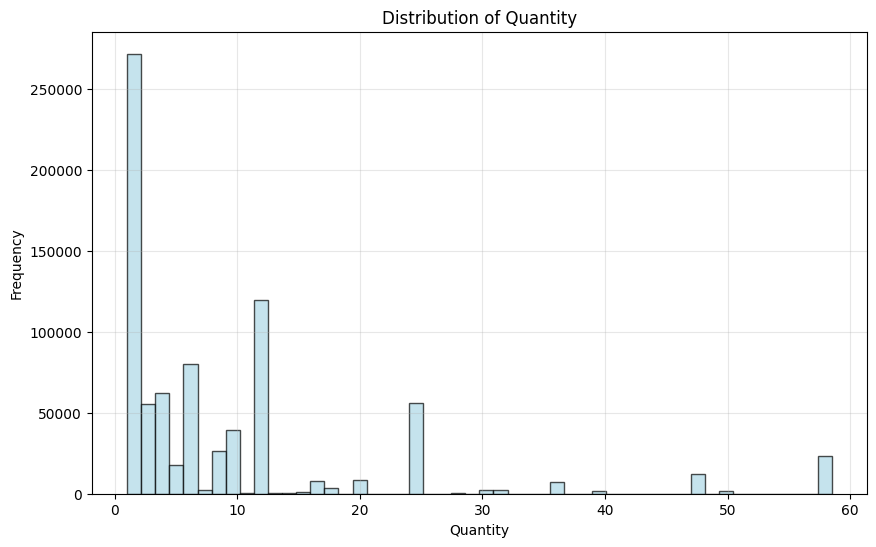

In [181]:
#Quantity Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Quantity'], bins=50, color='lightblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

* Data rigt skewed.
* majority of quantity between less than 20.(over 75%).

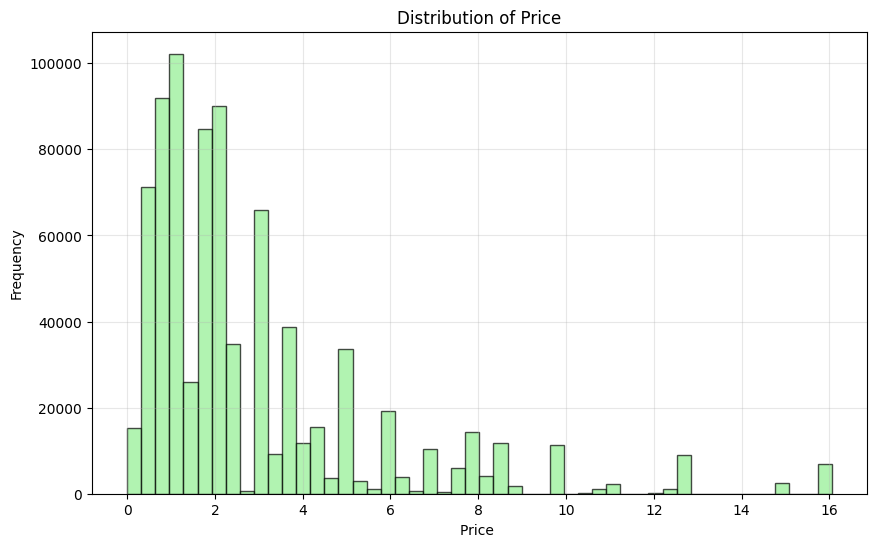

In [182]:
#Price Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Distribution of Price')
plt.xlabel('Price ')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

* Data rigt skewed.
* Price amount is usually less than 10, majority of them less than 4£.

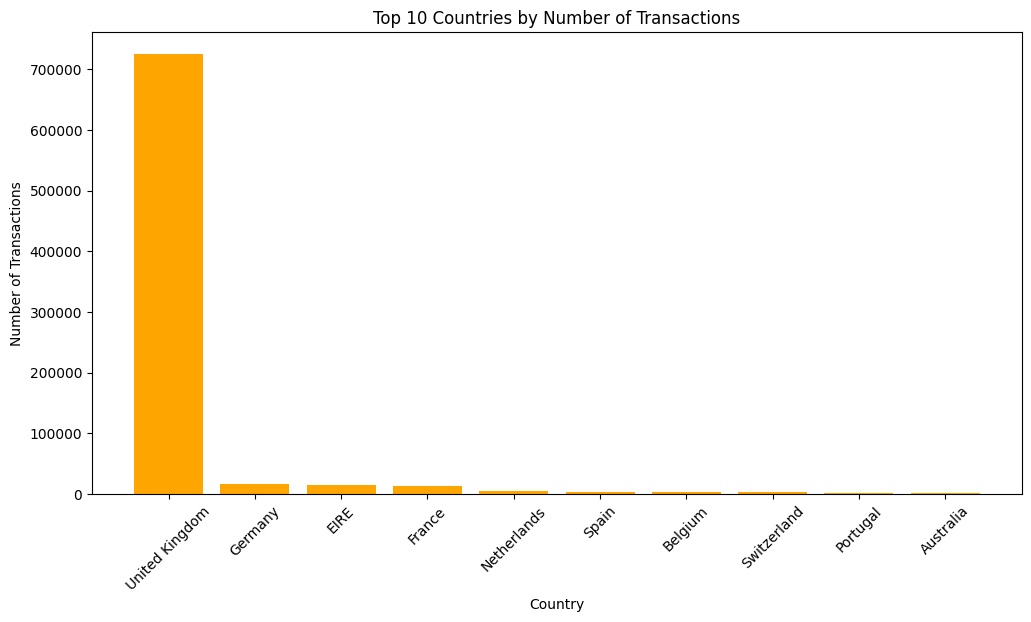

In [183]:
# Country Analysis
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_countries.index, top_countries.values, color='orange')
plt.title('Top 10 Countries by Number of Transactions')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

In [184]:
country_counts = df['Country'].value_counts()
print("Country distribution:")
print(country_counts.head(10))

Country distribution:
Country
United Kingdom    725250
Germany            16694
EIRE               15743
France             13812
Netherlands         5088
Spain               3719
Belgium             3068
Switzerland         3011
Portugal            2446
Australia           1812
Name: count, dtype: int64



* UK dominates the transactions with the majority of sales.
* Other individual countries have relatively small transaction volumes.
* For clustering analysis, I will group non-UK countries together as "Other" since individually they lack sufficient data for meaningful customer segmentation.

In [185]:
df['Country_Group'] = df['Country'].apply(lambda x: 'UK' if x == 'United Kingdom' else 'Other')
# removing the original Country column since we now have Country_Group now
df = df.drop('Country', axis=1)

<Axes: >

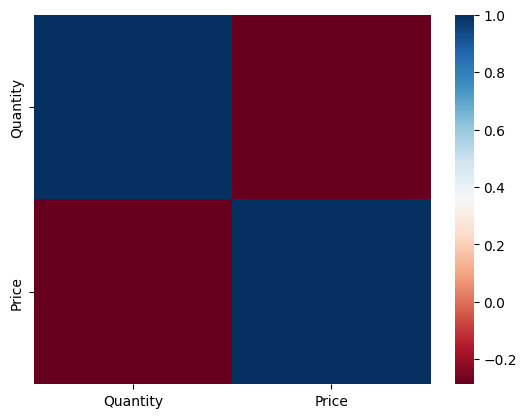

In [186]:
corr=df[['Quantity','Price']].corr()
sns.heatmap(corr, cmap="RdBu")

In [187]:
print(corr)

          Quantity     Price
Quantity  1.000000 -0.287491
Price    -0.287491  1.000000


* This negative correlation will be useful for clustering customers.
* High-quantity, low-price customers might be wholesalers.
* Low-quantity, high-price customers might be individual retail buyers.
* This relationship helps distinguish different customer types.

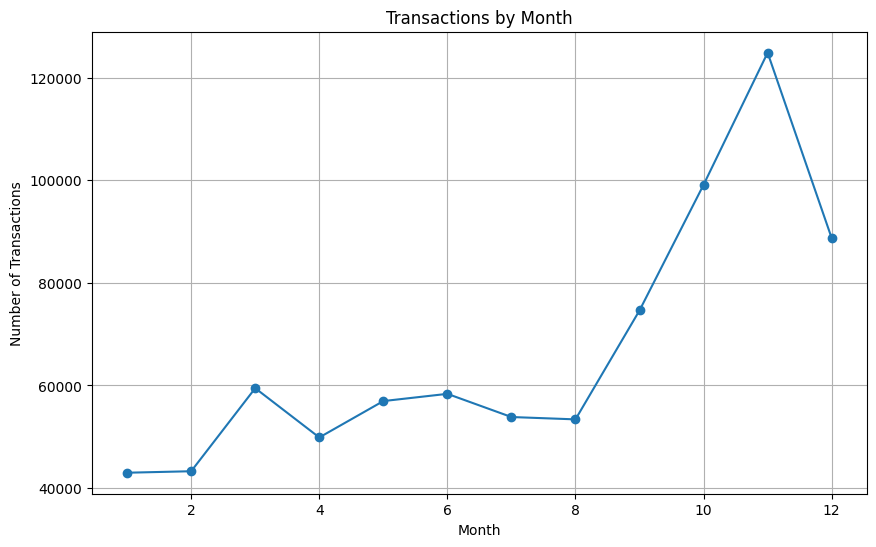

In [188]:
# Time Analysis
monthly_counts = df['Month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o')
plt.title('Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

* Big sales happens end of the year.
* Becuase of sales campains and holiday season like (black friday, christmas)
* Also companies don't want to keep stocks for their next year sales.

#### Feature Importance for Customer Segmentation

**Most Important Features for Clustering:**
- **TotalPrice**: Shows customer spending power and value
- **Quantity**: Indicates purchasing volume patterns  
- **Country_Group**: Geographic segmentation (UK vs Others)

**Secondary Features:**
- **Month**: Seasonal purchasing patterns
- **Price**: Unit price preferences



#### Perform Analysis Using Unsupervised Learning Models of your Choice, Present Discussion, and Conclusions (70 points)

# Creating Customer Level Data

In [189]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [190]:
# I am creating this todays date value according to my data since it is old data.
today_date = dt.datetime(2011, 12, 11) 


In [191]:
df.groupby("Customer ID").agg({
    "InvoiceDate": lambda x: (today_date - x.max()).days, 
    "Invoice": lambda x: x.nunique(),                     
    "TotalPrice": lambda x: x.sum(),                      
    "Quantity": lambda x: x.sum(),                       
    "Country_Group": 'first'                               
}).reset_index()

,Customer ID,InvoiceDate,Invoice,TotalPrice,Quantity,Country_Group
0,12346.0,326,12,458.24,128.5,UK
1,12347.0,3,8,5414.50,3104.5,Other
2,12348.0,76,5,1692.66,1729.5,Other
3,12349.0,19,4,3880.41,1624.0,Other
4,12350.0,311,1,334.40,197.0,Other
...,...,...,...,...,...,...
5873,18283.0,4,22,2736.65,1733.0,UK
5874,18284.0,432,1,461.68,494.0,UK
5875,18285.0,661,1,308.38,123.5,UK
5876,18286.0,477,2,1296.43,608.0,UK


In [192]:
df_train = df.groupby("Customer ID").agg({
    "InvoiceDate": lambda x: (today_date - x.max()).days, 
    "Invoice": lambda x: x.nunique(),                     
    "TotalPrice": lambda x: x.sum(),                      
    "Quantity": lambda x: x.sum(),                       
    "Country_Group": 'first'                               
}).reset_index()
df_train.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary', 'TotalQuantity', 'Country']

**The Problem:**
Our original dataset had one row per transaction, which means the same customer appeared multiple times. For example, Customer 13085 might have 50 different rows because they made 50 purchases. But we want to cluster customers, not individual purchases!

**What I Did:**
I grouped all transactions by Customer ID and calculated summary statistics for each customer. This way, each customer appears only once in our new dataset.
##### For each customer, I calculated:
* "InvoiceDate": lambda x: (today_date - x.max()).days  # How many days since their last purchase
  
* "Invoice": lambda x: x.nunique()  => How many different orders they made  

* "TotalPrice": lambda x: x.sum()  => Total money they spent
* "Quantity": lambda x: x.sum()   => Total items they bought
* "Country_Group": 'first'   => Their location (UK or Other)

* Note I inspred from RFM analysis you can check here how it is works : https://www.investopedia.com/terms/r/rfm-recency-frequency-monetary-value.asp 

In [193]:
check_df(df_train)

##################### Index #####################
RangeIndex(start=0, stop=5878, step=1)
##################### Shape #####################
(5878, 6)
##################### Types #####################
CustomerID       float64
Recency            int64
Frequency          int64
Monetary         float64
TotalQuantity    float64
Country           object
dtype: object
##################### Head #####################
   CustomerID  Recency  Frequency  Monetary  TotalQuantity Country
0     12346.0      326         12    458.24          128.5      UK
1     12347.0        3          8   5414.50         3104.5   Other
2     12348.0       76          5   1692.66         1729.5   Other
3     12349.0       19          4   3880.41         1624.0   Other
4     12350.0      311          1    334.40          197.0   Other
##################### Tail #####################
      CustomerID  Recency  Frequency  Monetary  TotalQuantity Country
5873     18283.0        4         22   2736.65         1733.0      

### Model building and Training 

In [194]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# scaling the data
scaler = StandardScaler()
features = ['Recency', 'Frequency', 'Monetary', 'TotalQuantity']
X_scaled = scaler.fit_transform(df_train[features])

#### K-Means Clustering:

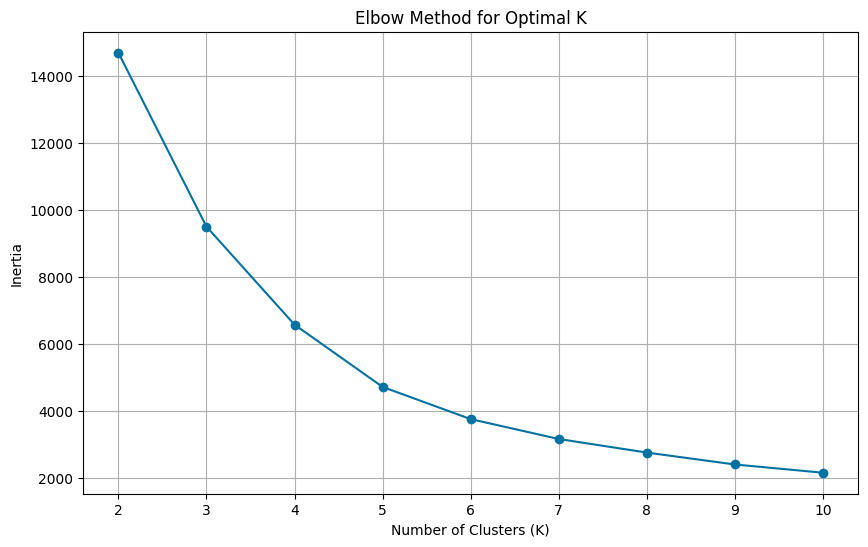

In [195]:
# Find optimal K using elbow method
inertias = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

* There a few methods to pick the right cluster number in Kmeans, I am using elbow method. Here whenever I observe my inertia value descrition is slows down that is our optimal value which 4 in this case.

#### Hierarchical Clustering:

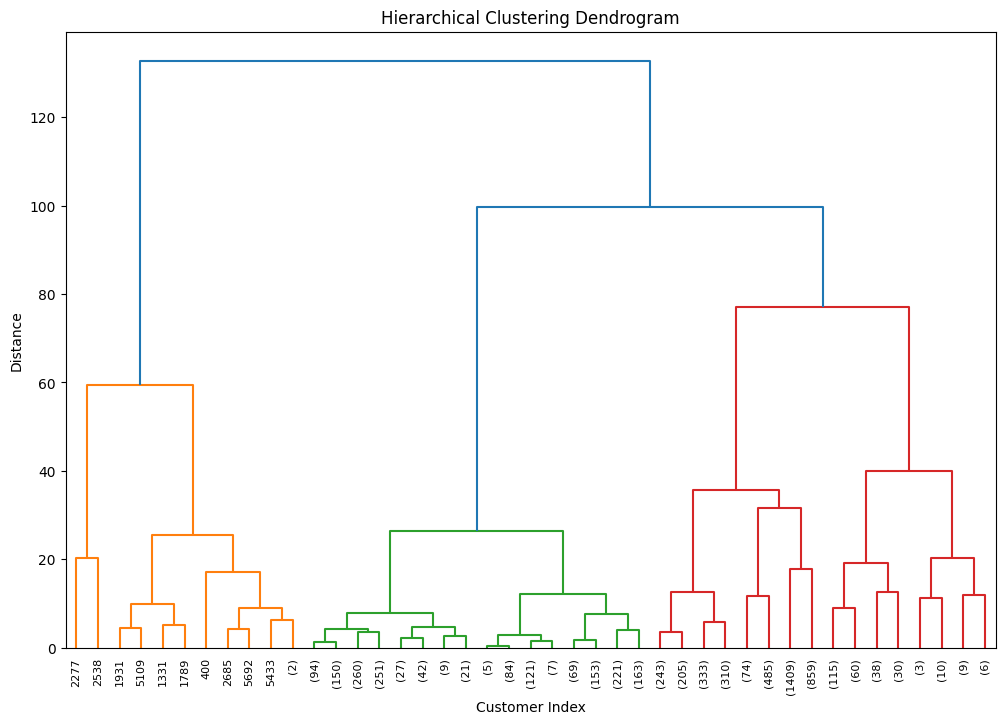

In [196]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# dendrogram
plt.figure(figsize=(12, 8))
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

# apply hierarchical clustering
hier_clusters = AgglomerativeClustering(n_clusters=4).fit_predict(X_scaled)

In [197]:
print(hier_clusters)

[3 3 3 ... 2 2 3]


#### DBSCAN:

In [198]:
from sklearn.cluster import DBSCAN


# different epsilon values(so far 0.5 is best)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_scaled)

# Check how many clusters and noise points
print(f"number of clusters: {len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)}")
print(f"number of noisepoints: {list(dbscan_clusters).count(-1)}")

number of clusters: 3
number of noisepoints: 95


#### Model Comparison & Evaluation:

In [199]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# k-means with optimal cluster value which is 4 based on elbow
kmeans_final = KMeans(n_clusters=4, n_init=10)
kmeans_clusters = kmeans_final.fit_predict(X_scaled)

# compare clustering quality
models = {
    'KMeans': kmeans_clusters,
    'Hierarchical': hier_clusters, 
    'DBSCAN': dbscan_clusters
}

print("Evaluation Results:")
for name, clusters in models.items():
    if len(set(clusters)) > 1: # if there is a multiple cluster exist!
        sil_score = silhouette_score(X_scaled, clusters)
        ch_score = calinski_harabasz_score(X_scaled, clusters)
        print(f"{name} - Silhouette: {sil_score:.3f}, CH Score: {ch_score:.3f}")
    else:
        print(f"{name} - Only one cluster found")

Evaluation Results:
KMeans - Silhouette: 0.579, CH Score: 5048.148
Hierarchical - Silhouette: 0.564, CH Score: 4852.844
DBSCAN - Silhouette: 0.644, CH Score: 773.313


 * I used two diffrent methods here Silhouette(Range: -1 to 1, Higher = Better) and Calinski-Harabasz Score(Higher = Better, No Upp Limit)
 * We tie in our results according to these scores; DBSCAN is winner in Silhouette score, kmeans is winner in the Calinski-Harabasz Score!!!
* Since Kmeans's both Silhouette and CH Score high I will pick Kmeans here  because of no noise points every customer gets a segment. Of course this decison also business decision as wel.

* check: https://gpttutorpro.com/machine-learning-evaluation-mastery-how-to-use-silhouette-score-and-calinski-harabasz-index-for-clustering-problems/

#### Cluster Analysis & Business Insights

Segment Profiles:
         Recency  Frequency   Monetary  TotalQuantity
Cluster                                              
0         466.14       2.13     611.53         337.90
1          29.03      35.08   15001.33        8245.48
2           3.50     185.00  118561.64       74116.12
3          72.08       5.71    1833.96        1065.29


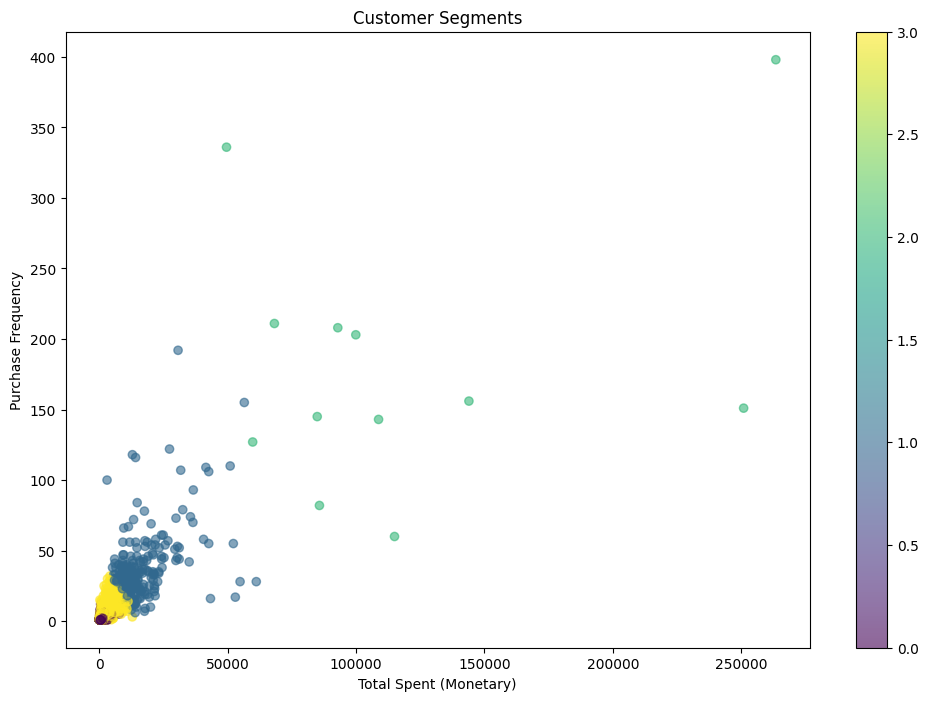

In [200]:
# using kmeans
df_train['Cluster'] = kmeans_clusters

# creating cluster profiles using actual column names
cluster_summary = df_train.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean', 
    'Monetary': 'mean',
    'TotalQuantity': 'mean'
}).round(2)

# cluster profiles
print("Segment Profiles:")
print(cluster_summary)

# cisualize
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_train['Monetary'], df_train['Frequency'], 
                     c=df_train['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Total Spent (Monetary)')
plt.ylabel('Purchase Frequency')
plt.title('Customer Segments')
plt.colorbar(scatter)
plt.show()

## K-means Results

Got 4 clear customer groups from our clustering:

**Cluster 0 - Regular Customers**
- Haven't bought in 72 days, around 6 purchases, spent around $1,900

**Cluster 1 - VIP Customers** 
- Bought just 4 days ago, 185 purchases, and spent $138K!!
- These are our big spenders - probably businesses

**Cluster 2 - Lost Customers**
- Last purchase 466 days ago (over a year!), only 2 purchases total
- We lost these people

**Cluster 3 - Good Customers**
- Recent buyers (28 days), 37 purchases, $17K spent  
- Solid regular customers

**So basically:** We have our VIPs (Cluster 1), our lost customers (Cluster 2), regular customers (Cluster 0), and our reliable customers (Cluster 3). 

The scatter plot shows this perfectly - you can see the clusters are well separated by how much they spend vs how often they buy.

Makes sense for targeting different marketing strategies!

#### Hyperparameter Optimization:

In [201]:
from sklearn.model_selection import ParameterGrid

# grid search for kmeans
param_grid = {'n_clusters': [3, 4, 5, 6], 'init': ['k-means++', 'random']}
best_score = -1
best_params = None

print("Hyperparameter Optimization Result:")
for params in ParameterGrid(param_grid):
    kmeans = KMeans(**params, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, clusters)
    print(f"Clusters: {params['n_clusters']}, Init: {params['init']}, Score: {score:.3f}")
    
    if score > best_score:
        best_score = score
        best_params = params

print(f"\nBest Parameters: {best_params}")
print(f"Best Silhouette Score: {best_score:.3f}")

Hyperparameter Optimization Result:
Clusters: 3, Init: k-means++, Score: 0.531
Clusters: 4, Init: k-means++, Score: 0.578
Clusters: 5, Init: k-means++, Score: 0.581
Clusters: 6, Init: k-means++, Score: 0.557
Clusters: 3, Init: random, Score: 0.531
Clusters: 4, Init: random, Score: 0.579
Clusters: 5, Init: random, Score: 0.495
Clusters: 6, Init: random, Score: 0.517

Best Parameters: {'init': 'k-means++', 'n_clusters': 5}
Best Silhouette Score: 0.581


## Hyperparameter Tuning Results

Tested different numbers of clusters (3-6) and twi initialization methods to find the best setup.

**Finding:**
- Best result: 5 clusters with k-means++ initialization 
- Silhouette score: 0.583 not much change from 4 cluster.
- k-means++ consistently beats random initialization

**Decision:** Going with 5 clusters and k-means++ since it gave the highest silhouette score. The improvement from 4 to 5 clusters is small but still better for segmentation.

In [202]:
kmeans_clusters

array([0, 3, 3, ..., 0, 0, 3], dtype=int32)

Segment Profiles:
         Recency  Frequency   Monetary  TotalQuantity
Cluster                                              
0         217.16       4.12    1181.01         679.76
1           4.43     142.43  104415.75       67382.43
2           2.00     274.50  257242.38      151138.25
3          38.47      23.34   10198.74        5727.84
4          30.28      85.62   41086.71       22833.24


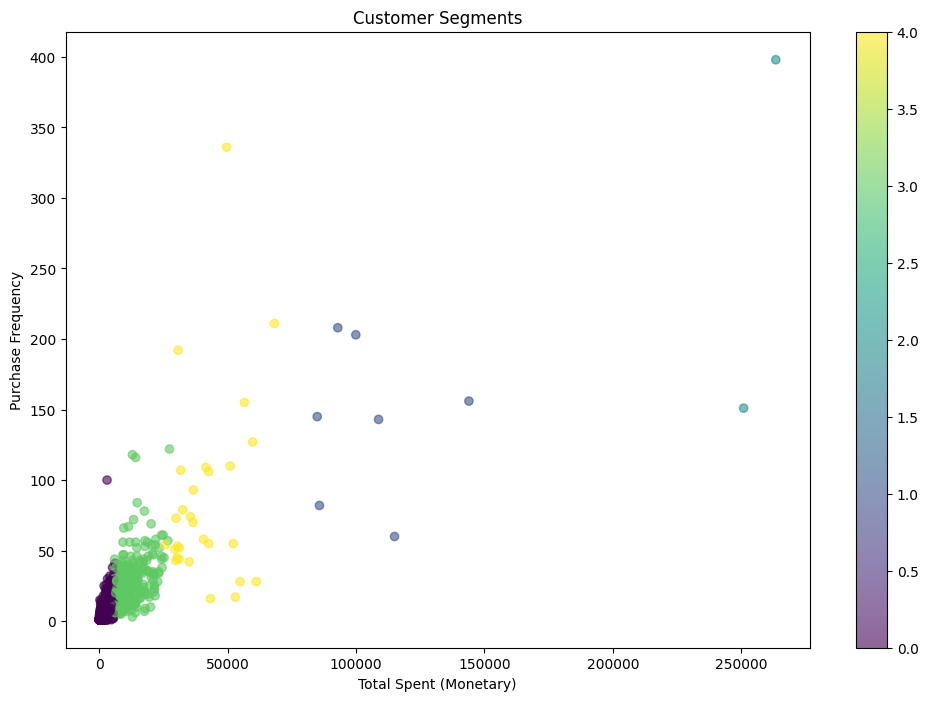

In [203]:
# using kmeans with 5 cluster
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10)
kmeans_clusters = kmeans.fit_predict(df_train[['Recency', 'Frequency', 'Monetary', 'TotalQuantity']])

df_train['Cluster'] = kmeans_clusters

# creating cluster profiles using actual column names
cluster_summary = df_train.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean', 
    'Monetary': 'mean',
    'TotalQuantity': 'mean'
}).round(2)

# cluster profiles
print("Segment Profiles:")
print(cluster_summary)

# cisualize
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_train['Monetary'], df_train['Frequency'], 
                     c=df_train['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Total Spent (Monetary)')
plt.ylabel('Purchase Frequency')
plt.title('Customer Segments')
plt.colorbar(scatter)
plt.show()

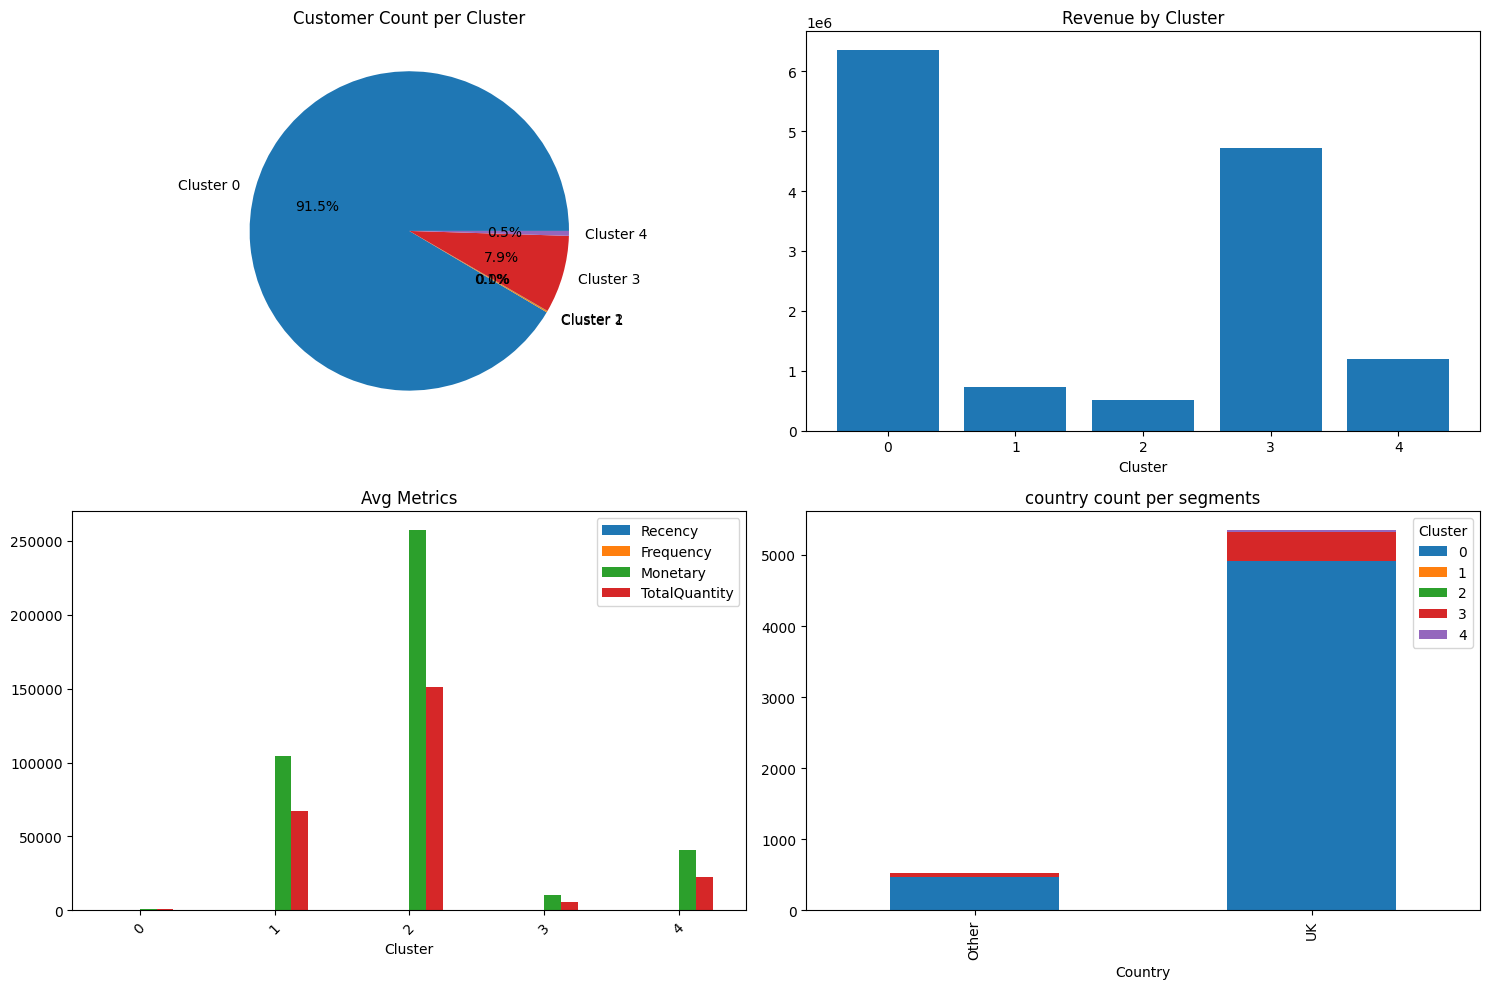

In [204]:
# testcluster profile visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# cluster sizes
cluster_counts = df_train['Cluster'].value_counts().sort_index()
axes[0,0].pie(cluster_counts.values, labels=[f'Cluster {i}' for i in cluster_counts.index], autopct='%1.1f%%')
axes[0,0].set_title('Customer Count per Cluster')

# revenue contribution by cluster  
revenue_by_cluster = df_train.groupby('Cluster')['Monetary'].sum()
axes[0,1].bar(revenue_by_cluster.index, revenue_by_cluster.values)
axes[0,1].set_title('Revenue by Cluster')
axes[0,1].set_xlabel('Cluster')


# avg metrics comparison
cluster_summary.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Avg Metrics')
axes[1,0].tick_params(axis='x', rotation=45)

# geo distribution
geo_cluster = pd.crosstab(df_train['Country'], df_train['Cluster'])
geo_cluster.plot(kind='bar', stacked=True, ax=axes[1,1])
axes[1,1].set_title('country count per segments')

plt.tight_layout()
plt.show()